In [1]:
import pandas as pd

In [2]:
insurance=pd.read_csv('F:/imarticus/imarticus accessment/python/EDA/Datasets/Visualization/insurance_data.csv')

In [3]:
insurance

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24,male,30.1,87,No,0,No,southeast,1131.51
2,3,27,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,37,male,33.7,80,No,0,No,northwest,1136.40
4,5,30,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...
1335,1336,44,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1337,59,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1338,30,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1339,37,male,30.4,106,No,0,Yes,southeast,62592.87


In [4]:
insurance.isnull().sum()

PatientID        0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

In [5]:
 # finding missing value with charts

<AxesSubplot:>

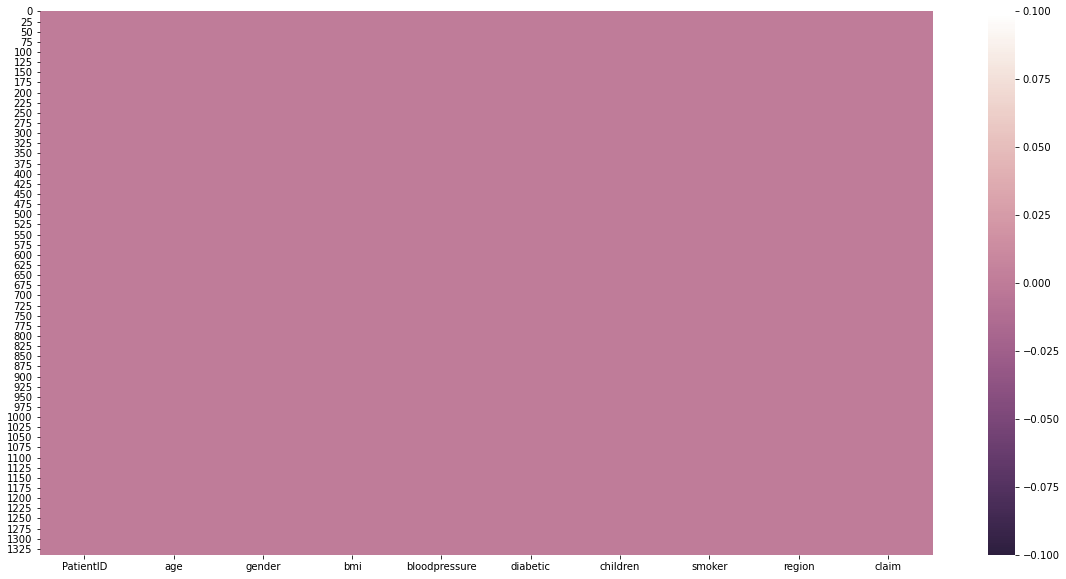

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 10))

cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(insurance.isnull(), cmap=cmap)

# Plot missing values

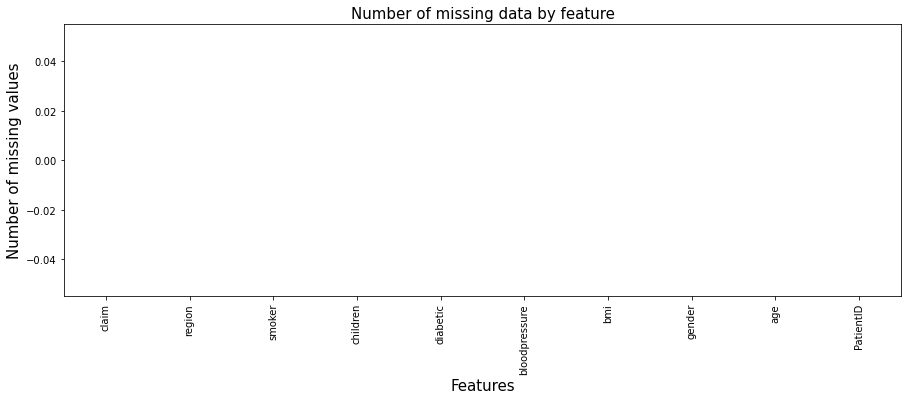

In [7]:
# Plot missing values
plt.figure(figsize=(15,5))
missing= insurance.isnull().sum()
missing= missing[missing == 0]
missing.sort_values(ascending= False, inplace=True)
plt.xlabel("Features", fontsize=15)
plt.ylabel("Number of missing values", fontsize=15)
plt.title("Number of missing data by feature", fontsize=15)
missing.plot(kind="bar")

plt.show()

# Pulling out names of numerical variables by conditioning dtypes NOT equal to object type

In [8]:
numerical_features = insurance.dtypes[insurance.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_features))
print(numerical_features)
# Pulling out names of categorical variables by conditioning dtypes equal to object type
categorical_features = insurance.dtypes[insurance.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_features))
print(categorical_features)

Number of Numerical features:  6
Index(['PatientID', 'age', 'bmi', 'bloodpressure', 'children', 'claim'], dtype='object')
Number of Categorical features:  4
Index(['gender', 'diabetic', 'smoker', 'region'], dtype='object')


# See distributionplot for all numeric variables

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

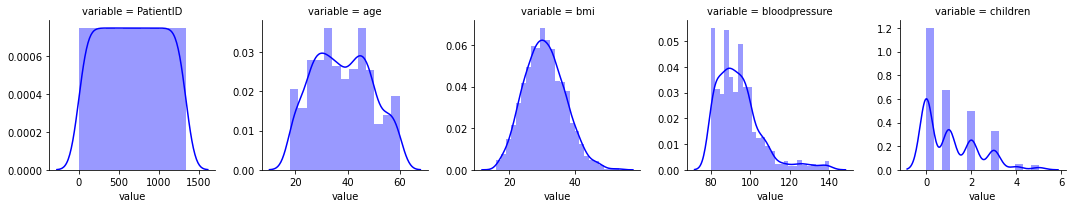

In [9]:
f = pd.melt(insurance, id_vars=['claim'],value_vars= numerical_features[numerical_features != 'claim'])
g = sns.FacetGrid(f, col="variable",  col_wrap=5, sharex=False, sharey=False)
g = g.map(sns.distplot, "value", color="blue")

# See distributionplot for single numeric variables

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='claim', ylabel='Density'>

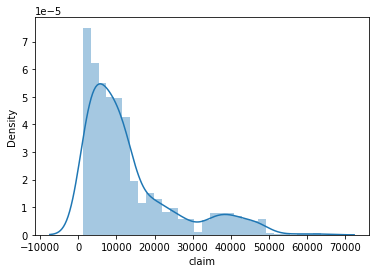

In [10]:
sns.distplot(insurance.claim)

# Boxplot of all categorical variable on x-axis and one numerical variable on y-axis


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


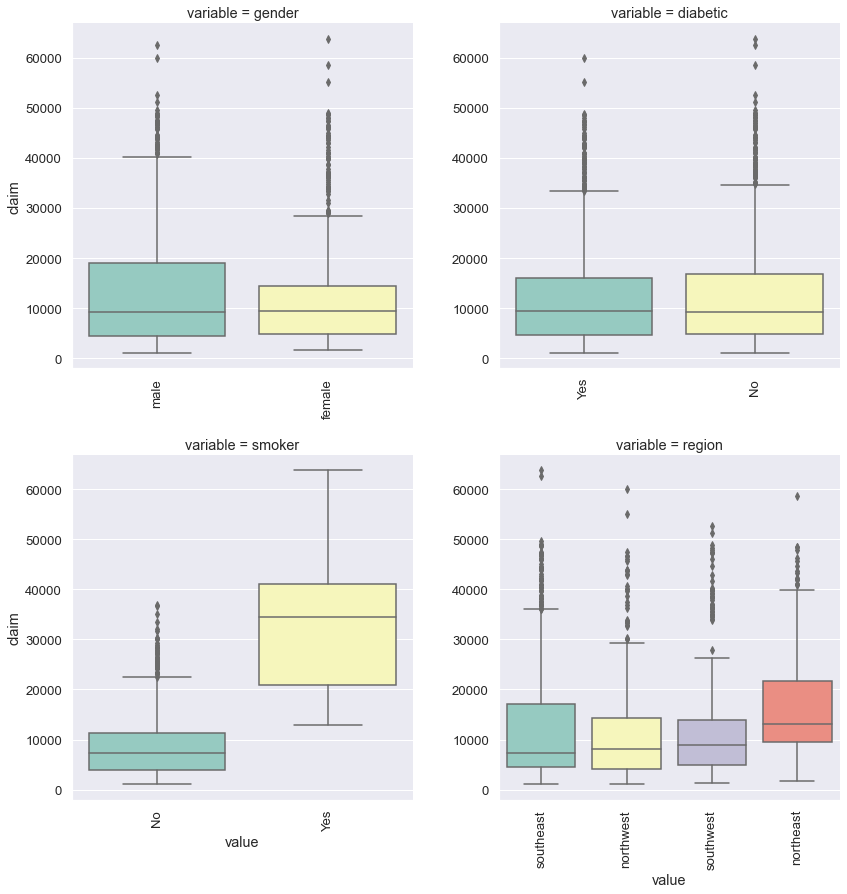

In [11]:
sns.set(font_scale=1.2)

f = pd.melt(insurance, id_vars=['claim'], value_vars=categorical_features)
facetobject = sns.FacetGrid(f, col="variable", col_wrap=2, sharex=False, sharey=False, size=6)
facetobject.map(sns.boxplot, "value", "claim", palette="Set3")
facetobject.fig.subplots_adjust(wspace=0.25, hspace=0.25)


for ax in facetobject.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=90)

# Boxplot of single numerical variable

<AxesSubplot:ylabel='claim'>

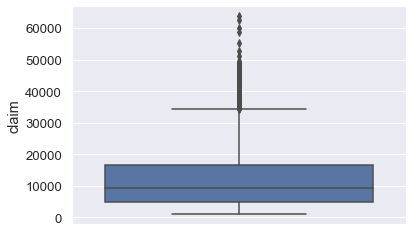

In [12]:
sns.boxplot(y=insurance.claim)

# boxplot of one numerical variable and one categorial variable

<AxesSubplot:xlabel='region', ylabel='claim'>

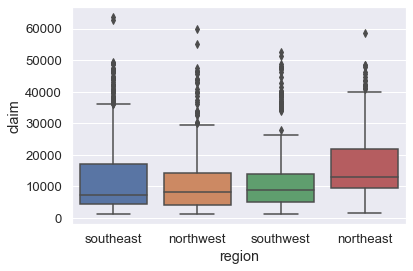

In [13]:
sns.boxplot(x=insurance['region'],y=insurance['claim'])

<AxesSubplot:xlabel='smoker', ylabel='claim'>

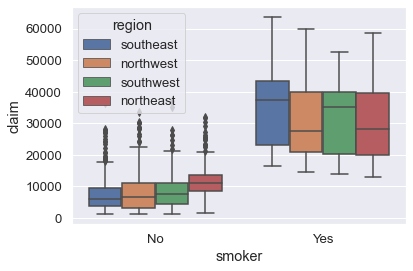

In [14]:
sns.boxplot(x=insurance['smoker'],y=insurance['claim'],hue=insurance['region'])  
# hue add one more categorial variable on x-axis

# line plot

In [15]:
import matplotlib.pyplot as plt

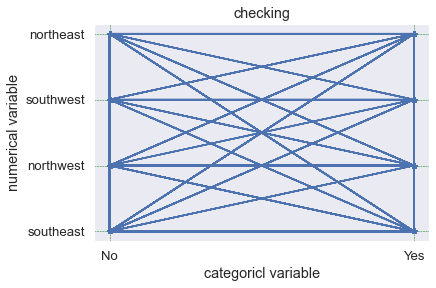

In [16]:
plt.plot(insurance.smoker,insurance.region,color='b',marker='*')
plt.grid
plt.title('checking')
plt.xlabel('categoricl variable')
plt.ylabel('numerical variable')
plt.grid(linestyle='--',linewidth='0.5',color='green')
plt.show()

# histogram of single numerical variable

Text(0, 0.5, 'frequency')

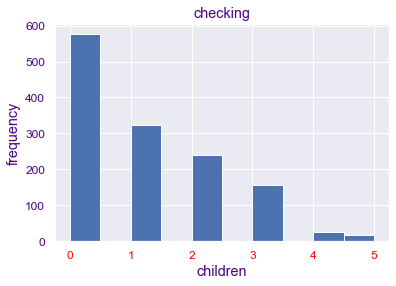

In [17]:
insurance['children'].plot.hist()
plt.title('checking',color='indigo')
plt.xticks(fontsize=12,color='red')
plt.yticks(fontsize=12,color='indigo')
plt.xlabel('children',color='indigo')
plt.ylabel('frequency',color='indigo')

# histogram of all numerical variable

<ipython-input-18-81bf9286cf9b>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  insurance.hist(ax=ax)


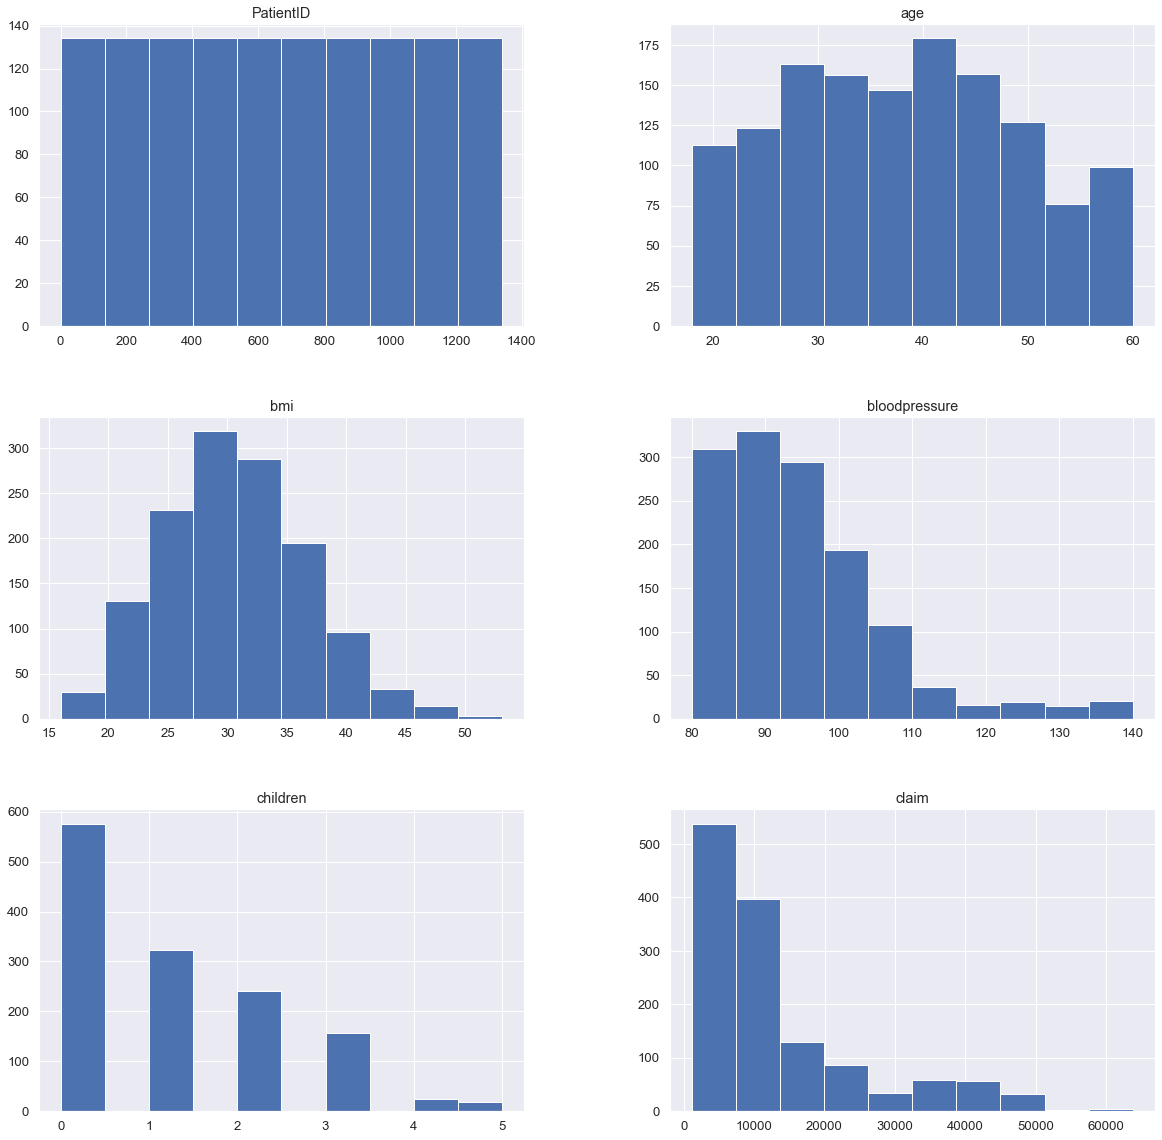

In [18]:
fig=plt.figure(figsize=(20,20))
ax=fig.gca()
insurance.hist(ax=ax)
plt.show()

# scatter plot

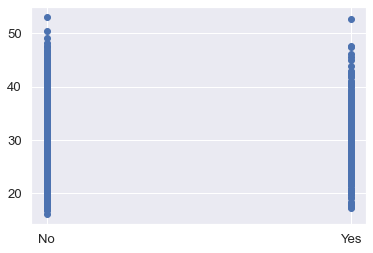

In [19]:
plt.scatter(x='smoker',y='bmi',data=insurance)

# heatmap of two numerical variable

<AxesSubplot:>

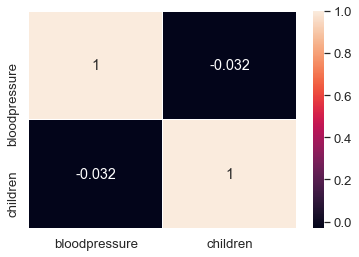

In [20]:
sns.heatmap(insurance[['bloodpressure','children']].corr(),annot=True,cbar=True,linewidth=0.5)


# heatmap of all numerical variable

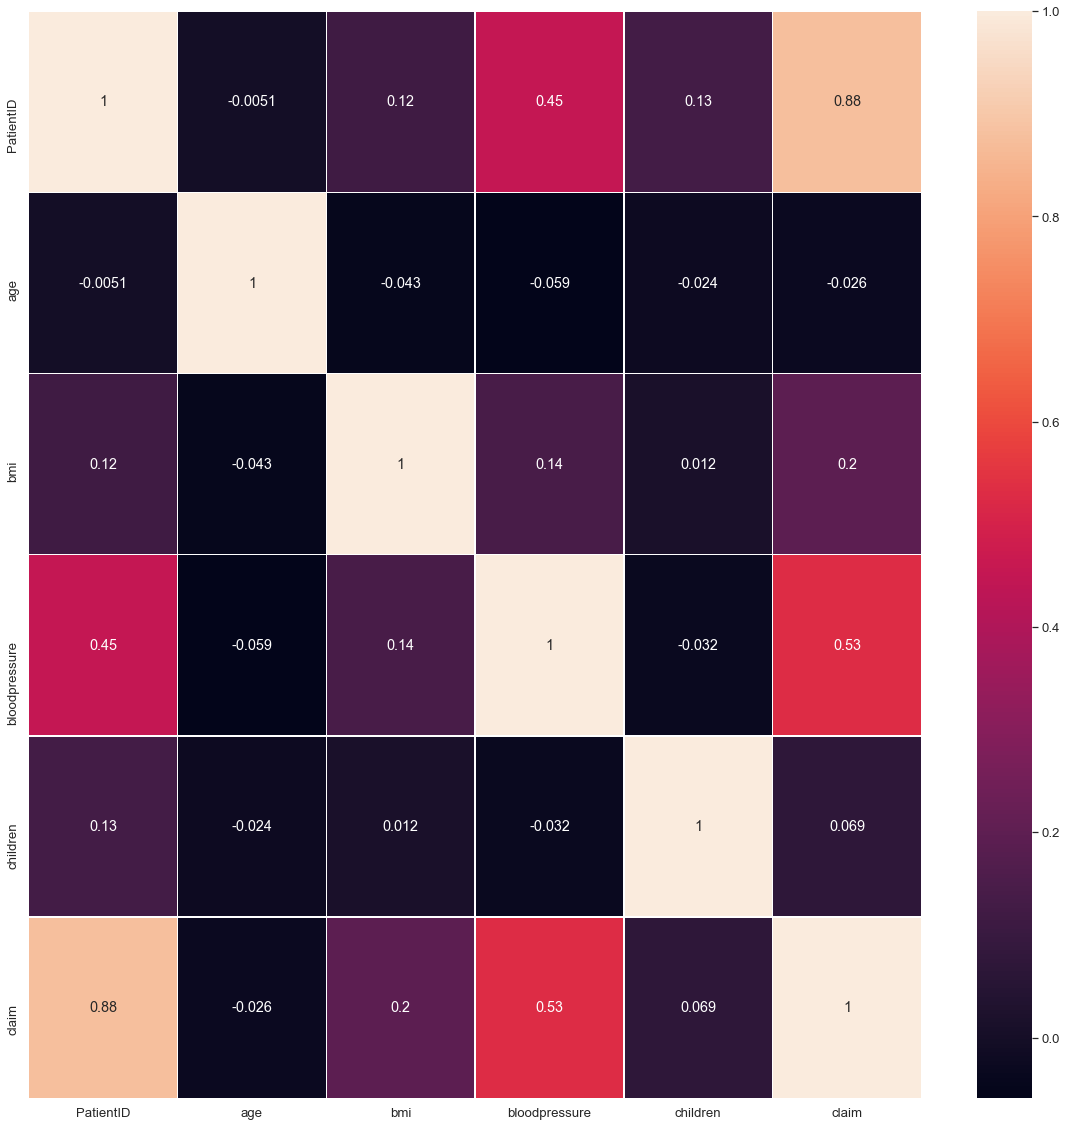

In [21]:
fig=plt.figure(figsize=(20,20))
ax=fig.gca()
sns.heatmap(insurance.corr(),annot=True,cbar=True,linewidth=0.5)
plt.show()

# stripplot

<AxesSubplot:xlabel='smoker', ylabel='children'>

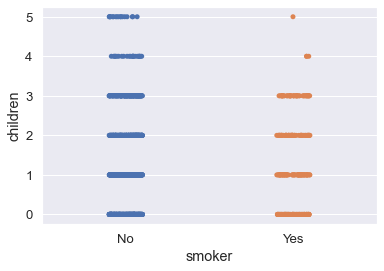

In [22]:
sns.stripplot(x='smoker',y='children',data=insurance)

# jointplot

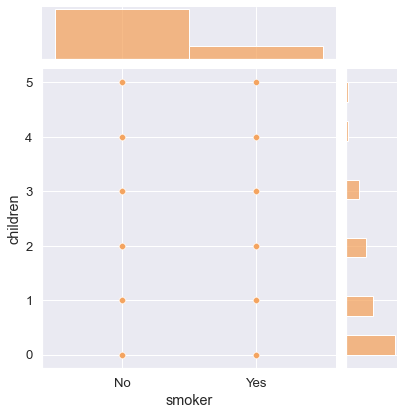

In [23]:
sns.jointplot(x='smoker',y='children',data=insurance,color='sandybrown')

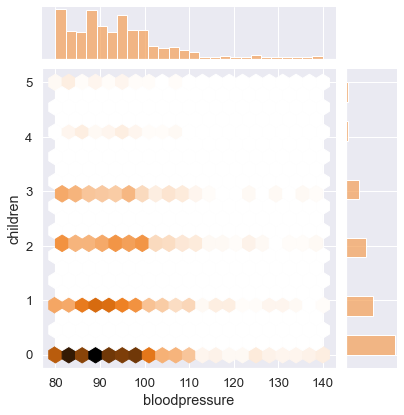

In [24]:
sns.jointplot(x='bloodpressure',y='children',data=insurance,color='sandybrown',kind='hex') # jointplot by kind=hex 
                                                                              # kind=hex shows more data consentrated area

# violinplot

<AxesSubplot:xlabel='smoker', ylabel='children'>

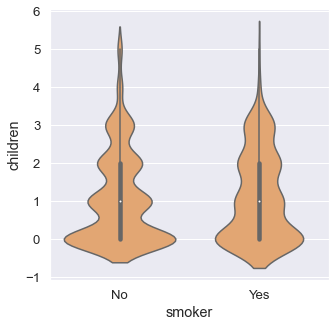

In [25]:
fig=plt.figure(figsize=(5,5))
sns.violinplot(x='smoker',y='children',data=insurance,color='sandybrown')

# swarmplot

<AxesSubplot:xlabel='smoker', ylabel='age'>

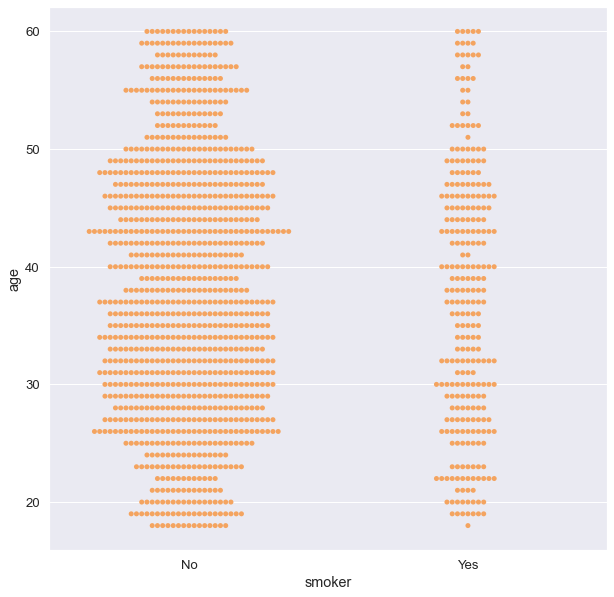

In [26]:
fig=plt.figure(figsize=(10,10))
sns.swarmplot(x='smoker',y='age',data=insurance,color='sandybrown')

# pairplot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


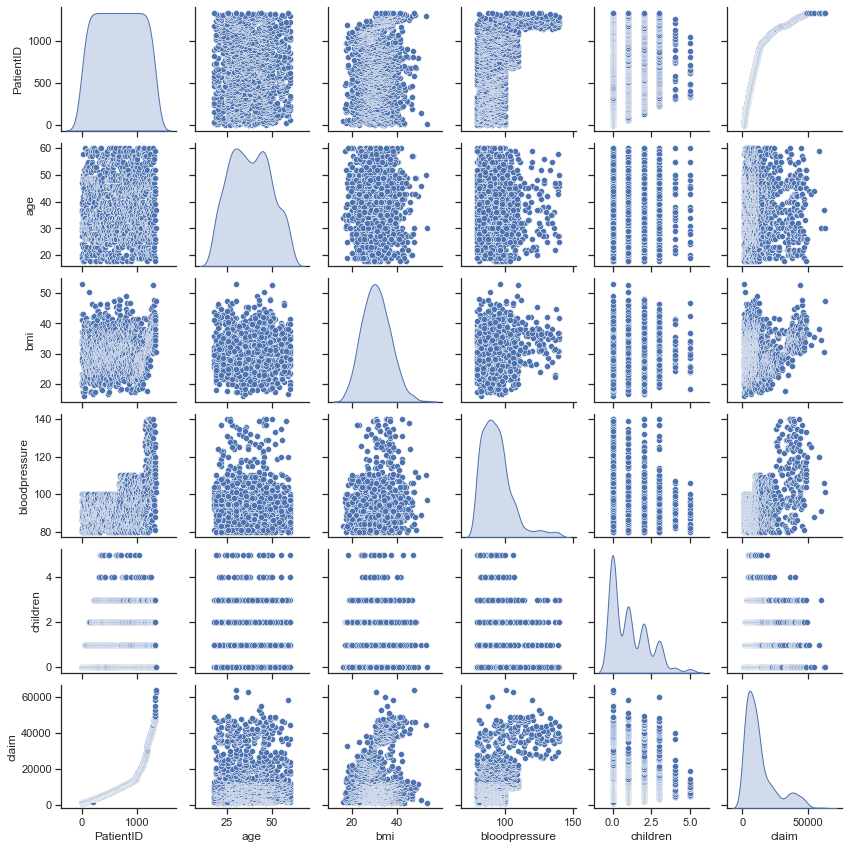

In [27]:
sns.set(style="ticks", color_codes=True)
columns= ['PatientID', 'age', 'bmi', 'bloodpressure', 'children', 'claim']
sns.pairplot(insurance[columns], size=2, kind= "scatter", diag_kind="kde")
plt.show()

# countplot

<AxesSubplot:xlabel='smoker', ylabel='count'>

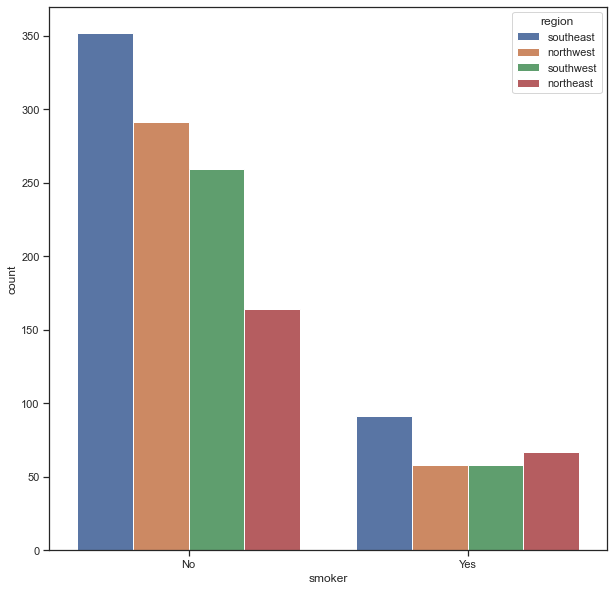

In [28]:
fig=plt.figure(figsize=(10,10))
sns.countplot(x='smoker',data=insurance,hue=insurance['region'])

# SubPlots ------- IN ONE TIME WE CAN SEE MANY PLOTS

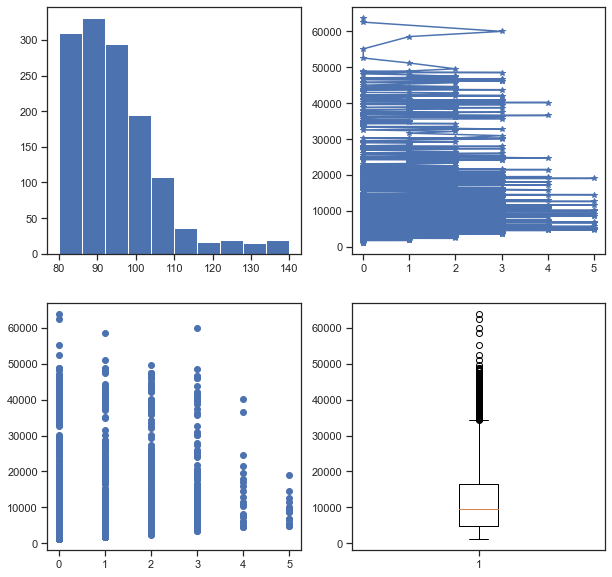

In [29]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)
data = np.random.randn(2, 100)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].hist(insurance['bloodpressure'])
axs[1, 0].scatter(x='children',y='claim',data=insurance)
axs[1, 1].boxplot(insurance['claim'])
axs[0, 1].plot(insurance.children,insurance.claim,color='b',marker='*')

plt.show()

# Linear Regression PLot ........of numerical variable

<AxesSubplot:xlabel='children', ylabel='claim'>

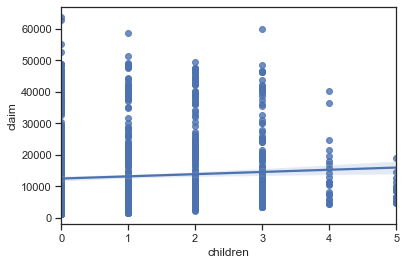

In [30]:
sns.regplot(x='children',y='claim',data=insurance)